In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

In [137]:
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
eonDF = pd.read_csv('/data/local/ringsys/202111_3dComparison/results/EON_result_summary.csv', sep="\t")

In [3]:
eonDF

,Query,Query_smiles,EON_ET_pb,EON_ET_pb_name,EON_ET_pb_smiles,EON_ET_combo,EON_ET_combo_name,EON_ET_combo_smiles,EON_ShapeTanimoto,EON_ShapeTanimoto_name,EON_ShapeTanimoto_smiles
0,p66_125,O=C1C=CC2=CC(=O)[C@@H]3CC[C@H]1[C@H]2C3,0.911,p183_417,O=C1C[C@H]2CNC(=O)C[C@H]2C1,1.661,p183_417,O=C1C[C@H]2CNC(=O)C[C@H]2C1,0.928,p129_391,O=C1C=CC[C@@H]2CCCC[C@H]12
1,p103_91,O=C1OCCc2c1ccc1[nH]c3ccccc3c21,0.830,p89_10,O=C1OC[C@@H]2Cc3c([nH]c4ccccc34)CN12,1.689,p89_10,O=C1OC[C@@H]2Cc3c([nH]c4ccccc34)CN12,0.946,p155_146,O=c1nc2[nH]c3ccccc3n2c2c1CCC2
2,p178_63,O=C1CNC(=O)CNC(=O)CNC(=O)[C@@H]2CSSC[C@@H]3NC(...,0.173,p185_145,c1cc2cc(c1)C[n+]1ccc(cc1)-c1cc[n+](cc1)Cc1cccc...,0.412,p191_111,O=S1(=O)[C@@]23CCCCCCCCCC[C@]45CCCC[C@](CCCCCC...,0.342,p191_110,O=S1(=O)[C@@]23CCCCCCCC[C@]45CCCC[C@](CCCCCCCC...
3,p79_117,C=C1C(=O)O[C@]23C=C[C@@H]4CCO[C@H](O[C@@H]12)[...,0.643,p99_131,O=C1C[C@H]2O[C@@H]3OCO[C@H]3[C@@H]2O1,1.370,p4_215,C=C1C[C@@H]2C(=O)CCC[C@@H]2OC1=O,0.866,p4_253,C=C1C[C@@]2(C[C@@H]3CC[C@H]2C3)OC1=O
4,p111_133,C1=C2CCCC[C@H]2CCc2ccccc21,0.876,p3_194,c1ccc2c(c1)CC[C@@H]1CCCC[C@H]21,1.753,p182_196,c1ccc2c(c1)CC[C@H]1CCCCC[C@@H]1C2,0.956,p142_174,c1ccc2c(c1)N=C1CCCC[C@H]1CN2
...,...,...,...,...,...,...,...,...,...,...,...
23535,p137_16,C=C1CCCC[C@H]2CC[C@@H](O2)[C@H]2CCC[C@@H]2C1,0.744,p93_133,C1=NC2(CC1)CCCCC2,1.334,p132_201,C1=CC[C@@]2(CCCO2)C2(C1)CCCC2,0.902,p82_56,C1=CC[C@@H]2CCCCCCCCCC[C@H]2C1
23536,p103_36,O=C1NC(=O)c2cc3c(cc21)CCO3,0.917,p91_82,O=C1NC(=O)c2cc3scnc3cc21,1.831,p91_82,O=C1NC(=O)c2cc3scnc3cc21,0.955,p161_55,O=c1cc[nH]c2cc3c(cc12)OCC3
23537,p167_70,O=C1C=C[C@H]2[C@H](C1)CC(=O)[C@@H]1CCCC[C@@H]21,0.888,p100_221,O=C1CC[C@@H]2[C@@H]3CC[C@@H]4CCC[C@H]4[C@H]3C(...,1.723,p100_223,O=C1CC[C@@H]2[C@@H]3CC[C@H]4CCC[C@H]4[C@H]3C(=...,0.951,p5_297,C1CC[C@@H]2[C@@H](C1)CC[C@H]1CCCC[C@@H]12
23538,p21_47,O=C1CCCC2=C1c1cc3ccccc3cc1C(=O)C2,0.727,p130_42,O=C1C[C@@H]2CCCC(=O)[C@H]2c2ccccc21,1.534,p130_42,O=C1C[C@@H]2CCCC(=O)[C@H]2c2ccccc21,0.991,p112_166,O=C1CCCC2=C1c1cc3ccccc3cc1NC2


In [4]:
len(set(eonDF.Query))

23540

In [4]:
eonDFbestETcombo = pd.read_csv('/data/local/ringsys/202111_3dComparison/results/EON_result_summary_by_best_combo.csv', sep='\t')

In [138]:
# add up back the 4181 removed queries 
def plot_density_plus(score_list, column, xlabel):
    '''
    Plots the similarity score of a given column of the EON result dataframe.

    :param score_list: The score list to plot
    :param column: the column of the dataframe which will be plotted
    :param xlabel: the label of the x axis
    '''
    plt.rcParams['font.sans-serif'] = "Arial"
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['figure.figsize'] = 10.5, 7.5
    sns.kdeplot(score_list, shade=False, color='#145c37', linewidth=2.5)
    plt.xlabel(xlabel, fontsize=30)
    plt.ylabel('Probability density', fontsize=30)
    #plt.xlim([-0.05,1.1])
    plt.tick_params(labelsize=24)
    plt.show()

In [48]:
eon_et_combo_list = list(eonDF['EON_ET_combo'])
add_list = 4181*[2.0]
eon_et_combo_scores = eon_et_combo_list + add_list

In [51]:
len(eon_et_combo_list),len(eon_et_combo_scores)

(23540, 27721)

In [65]:
4181 / (len(eonDF)+4181)

0.1508242848382093

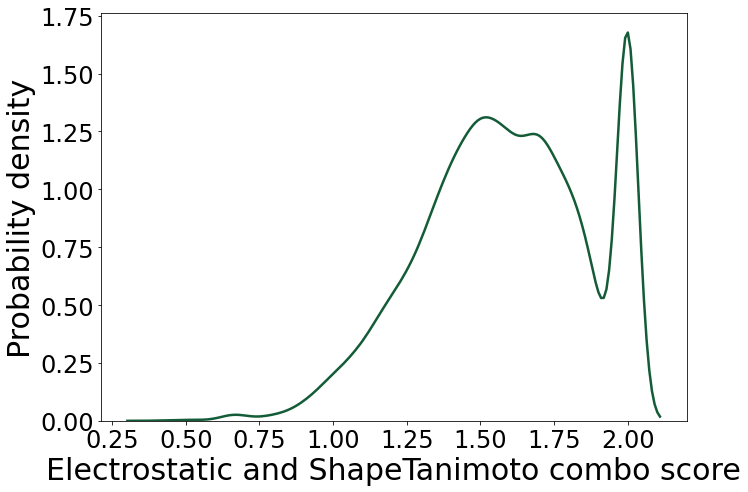

In [139]:
plot_density_plus(eon_et_combo_scores, 'EON_ET_combo', 'Electrostatic and ShapeTanimoto combo score')

In [58]:
eon_et_pb_scores = list(eonDF['EON_ET_pb']) + 4181*[1.0]

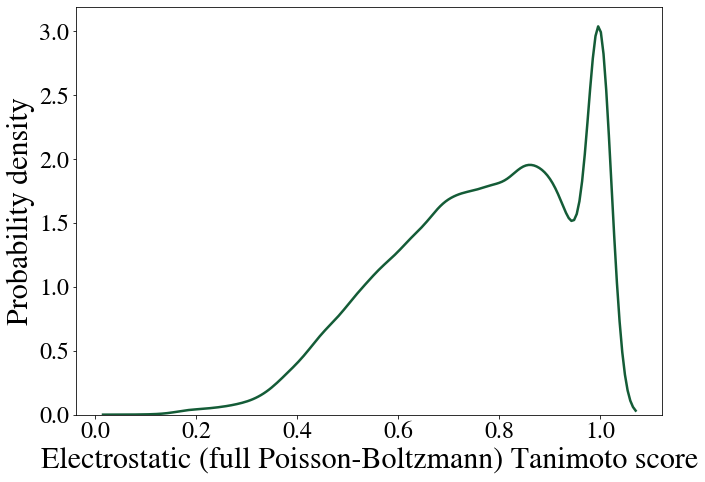

In [59]:
plot_density_plus(eon_et_pb_scores, 'EON_ET_pb', 'Electrostatic (full Poisson-Boltzmann) Tanimoto score')

In [60]:
eon_shape_scores = list(eonDF['EON_ShapeTanimoto']) + 4181*[1.0]

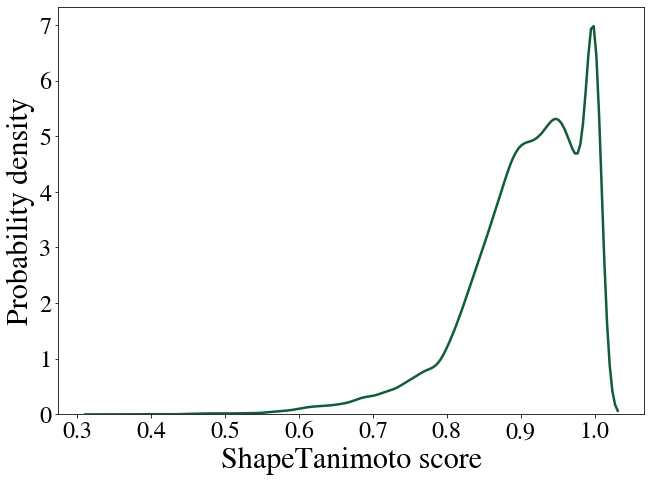

In [62]:
plot_density_plus(eon_shape_scores, 'EON_ShapeTanimoto', 'ShapeTanimoto score')

## calc_proportion_more_than_n

In [75]:
def calc_proportion_more_than_n_plus(eonDF, column, n):
    '''
    Calculates the proportion of NP ring systems which have a given score above a threshold for their best
     matching SM ring system.

    :param eonDF: dataframe with EON results
    :param column: the score column (ET_pb, ST or ET_combo)
    :param n: threshold
    '''
    numMoreThanN = len(eonDF[eonDF[column] >= n]) +4181
    dfSize = len(eonDF) +4181
    print('{}\t{:.1f}\t{:.2f}%\n'.format(column, n, (numMoreThanN/dfSize)*100))
    print(numMoreThanN)

In [76]:
for n in range(1, 11):
    calc_proportion_more_than_n_plus(eonDF, 'EON_ET_pb', n * 0.1)

EON_ET_pb	0.1	100.00%

27720
EON_ET_pb	0.2	99.81%

27669
EON_ET_pb	0.3	99.18%

27495
EON_ET_pb	0.4	97.01%

26891
EON_ET_pb	0.5	90.79%

25169
EON_ET_pb	0.6	79.85%

22134
EON_ET_pb	0.7	64.93%

17999
EON_ET_pb	0.8	47.38%

13134
EON_ET_pb	0.9	28.34%

7856
EON_ET_pb	1.0	16.61%

4605


In [77]:
for n in range(1, 11):
    calc_proportion_more_than_n_plus(eonDF, 'EON_ShapeTanimoto', n * 0.1)

EON_ShapeTanimoto	0.1	100.00%

27721
EON_ShapeTanimoto	0.2	100.00%

27721
EON_ShapeTanimoto	0.3	100.00%

27721
EON_ShapeTanimoto	0.4	99.99%

27717
EON_ShapeTanimoto	0.5	99.88%

27689
EON_ShapeTanimoto	0.6	99.49%

27579
EON_ShapeTanimoto	0.7	97.49%

27026
EON_ShapeTanimoto	0.8	91.27%

25300
EON_ShapeTanimoto	0.9	60.87%

16875
EON_ShapeTanimoto	1.0	15.09%

4184


In [78]:
for n in range(1, 21):
    calc_proportion_more_than_n_plus(eonDF, 'EON_ET_combo', n * 0.1)

EON_ET_combo	0.1	100.00%

27721
EON_ET_combo	0.2	100.00%

27721
EON_ET_combo	0.3	100.00%

27721
EON_ET_combo	0.4	100.00%

27721
EON_ET_combo	0.5	99.98%

27715
EON_ET_combo	0.6	99.93%

27702
EON_ET_combo	0.7	99.68%

27633
EON_ET_combo	0.8	99.51%

27585
EON_ET_combo	0.9	99.04%

27454
EON_ET_combo	1.0	97.64%

27066
EON_ET_combo	1.1	95.01%

26338
EON_ET_combo	1.2	90.55%

25100
EON_ET_combo	1.3	84.15%

23328
EON_ET_combo	1.4	74.52%

20659
EON_ET_combo	1.5	62.18%

17238
EON_ET_combo	1.6	49.18%

13634
EON_ET_combo	1.7	36.78%

10195
EON_ET_combo	1.8	25.44%

7052
EON_ET_combo	1.9	16.89%

4682
EON_ET_combo	2.0	15.08%

4181
